# Kuis 2: K-means Clustering

- Nama: Faiz Unisa Jazadi
- NIM: 21/475298/PA/20563
- Kelas: KOMA
- Tanggal: 2023-02-27

## Soal

Lakukan $k$-means clustering menggunakan data berikut.

|Objek|$x$|$y$|
|-|-|-|
|0|10|6|
|1|9|4|
|2|5|5|
|3|6|2|
|4|15|10|
|5|20|10|
|6|18|15|
|7|17|8|
|8|8|8|
|9|15|15|
|10|6|8|
|11|8|2|

Ketentuan: diperbolehkan menggunakan library selama tahapan algoritma $k$-means tetap terlihat

## Solusi

Pertama, data direpresentasikan dengan sebuah array dua dimensi.

In [3]:
import numpy as np

q1_data = np.array([[10, 6],
                  [9, 4],
                  [5, 5],
                  [6, 2],
                  [15, 10],
                  [20, 10],
                  [18, 15],
                  [17, 8],
                  [8, 8],
                  [15, 15],
                  [6, 8],
                  [8, 2]])

assert len(q1_data) == 12  # validate data

def build_cluster(data: np.ndarray, obj_ids: list[int]) -> np.ndarray:
    """Construct cluster points by object index"""
    return np.array([data[i] for i in obj_ids])

def euclidean_dist(a: np.ndarray, b: np.ndarray) -> np.float64:
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

def calc_centroid(data: np.ndarray,
                  obj_ids: list[int]) -> (np.float64, np.float64):
    cluster = build_cluster(data, obj_ids)
    x, y = np.column_stack(cluster)
    return np.array([np.mean(x), np.mean(y)])

Definisikan juga fungsi untuk memvisualisasikan data dengan scatter plot.

In [6]:
import matplotlib.pyplot as plt

def visualize_data(clusters: list):
    for cluster in clusters:
        plt.scatter(*zip(*cluster))
    plt.show()

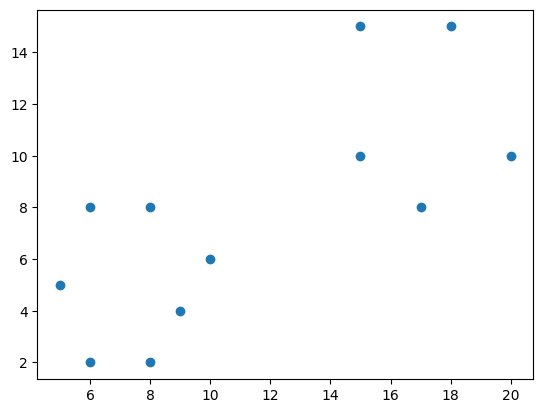

In [4]:
visualize_data(build_cluster(q1_data, (range(12),)))

## K-means

Iteration 0


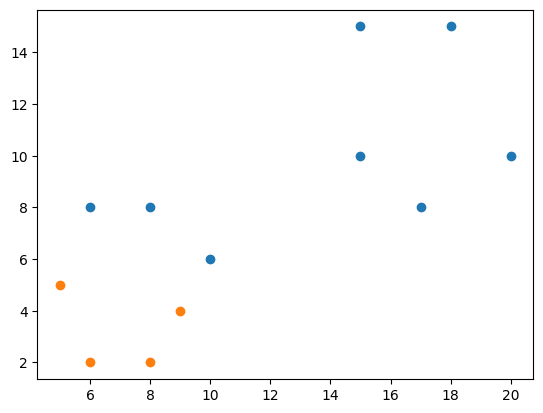

Iteration 1


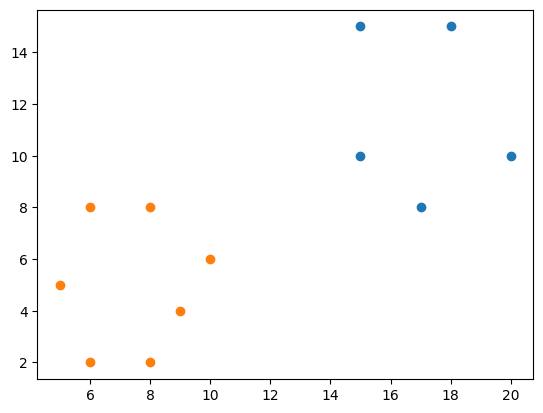

Iteration 2


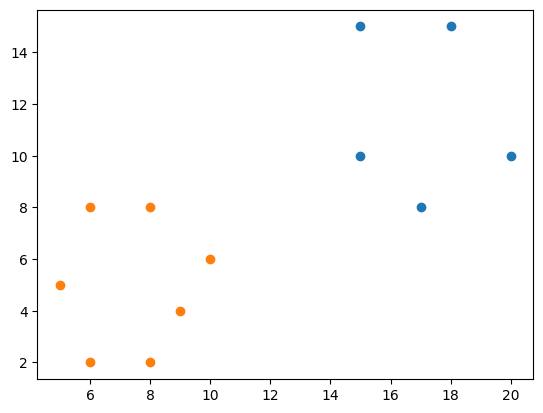

Centroids not updated, stopping loop


[[4, 5, 6, 7, 9], [0, 1, 2, 3, 8, 10, 11]]

In [7]:
def k_means(data: np.ndarray,
            centroids: np.ndarray,
            show_steps: bool = False) -> np.ndarray:
    """
    Perfom k-means clustering on `data` with provided initial centroids
    Returns clusters build using `build_cluster()`
    """
    
    updated = True
    iteration = 0
    while updated:
        clusters = [list() for _ in range(len(centroids))]
        updated = False
        
        # determine membership of objects
        for i, obj in enumerate(data):
            distances = [euclidean_dist(obj, c) for c in centroids]
            cluster_i = np.argmin(distances)
            clusters[cluster_i].append(i)
        
        # elect new central points
        for i, old_centroid in enumerate(centroids):
            new_centroid = calc_centroid(data, clusters[i])
            if (old_centroid == new_centroid).all():
                continue
            centroids[i] = new_centroid
            updated = True
        
        if show_steps:
            print(f'Iteration {iteration}')
            visualize_data([build_cluster(data, c) for c in clusters])
            if not updated:
                print('Centroids not updated, stopping loop')
            iteration += 1
    return clusters
            

k_means(q1_data, [q1_data[0], q1_data[1]], True)

### Tambahan Kuis untuk Hari Senin (2023-03-06)

1. Lakukan k-means dengan 3 cluster (pusat cluster adalah objek 1, 4, dan 9)
2. Aglomerative hierarchical clustering (semua metode, ada 4)

#### K-means Clustering

In [2]:
q2_data = np.array([
    [10, 6],
    [9, 4],
    [2, 5],
    [2, 2], 
    [15, 10], 
    [20, 10], 
    [18, 10], 
    [17, 8], 
    [8, 8], 
    [17, 12], 
    [3, 4], 
    [7, 6]])


k_means(q2_data, [q2_data[0], q2_data[3], q2_data[8]], True)

NameError: name 'np' is not defined

In [ ]:
simple_linkage_dist()

#### Aglomerative Hierarchical Clustering

Kodenya masih jelek, tapi minimal jalan dulu :/

In [1]:
import itertools

def merge(data, i, j):  # merge i and j to i
    data[i] = [data[i], data[j]]
    del data[j]
    return data

def is_iterable(obj):
    try:
        iter(obj)
    except TypeError:
        return False
    return True

def flatten(data):
    flat_data = []
    if not is_iterable(data):
        return [data]
    for el in data:
        if not is_iterable(el) or all(map(lambda x: not is_iterable(x), el)):
            flat_data.append(el)
        else:
            flat_data += flatten(el)
    return flat_data

def simple_linkage_dist(c1, c2):
    distances = map(lambda a: euclidean_dist(a[0], a[1]),
                    itertools.product(c1, c2))
    return min(distances)

def complete_linkage_dist(c1, c2):
    distances = map(lambda a: euclidean_dist(a[0], a[1]),
                    itertools.product(c1, c2))
    return max(distances)

def average_linkage_dist(c1, c2):
    distances = map(lambda a: euclidean_dist(a[0], a[1]),
                    itertools.product(c1, c2))
    distances = list(distances)
    return sum(distances)/len(list(distances))

def centroid_linkage_dist(c1, c2):
    centroids = []
    for cluster in c1, c2:
        x = sum(c[0] for c in cluster)/len(cluster)
        y = sum(c[1] for c in cluster)/len(cluster)
        centroids.append((x, y))
    return euclidean_dist(*centroids)

def ahc_clusterize(data, dist_func, n_clusters=2, show_steps=False):
    data = data.copy()
    i = 1
    while len(data) > n_clusters:  # loop until no clusters can be merged
        flat_clusters = [flatten(c) for c in data]
        cluster_pairs = list(itertools.combinations(flat_clusters, 2))
        distances = [dist_func(c1, c2) for c1, c2 in cluster_pairs]
        min_pair = cluster_pairs[distances.index(min(distances))]
        merge(data, flat_clusters.index(min_pair[0]), flat_clusters.index(min_pair[1]))
        if show_steps:
            print(f'Iteration {i}, clusters: {len(data)}')
            print(data)
            visualize_data((flatten(c) for c in data))
            i += 1
    return data
    
d = q2_data.tolist()
d = [[e] for e in d]

NameError: name 'q2_data' is not defined

##### Simple Linkage

Iteration 1, clusters: 11
[[[10, 6]], [[9, 4]], [[[2, 5]], [[3, 4]]], [[2, 2]], [[15, 10]], [[20, 10]], [[18, 10]], [[17, 8]], [[8, 8]], [[17, 12]], [[7, 6]]]


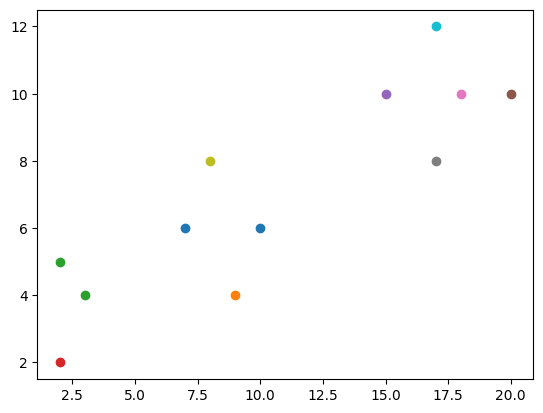

Iteration 2, clusters: 10
[[[10, 6]], [[9, 4]], [[[2, 5]], [[3, 4]]], [[2, 2]], [[15, 10]], [[[20, 10]], [[18, 10]]], [[17, 8]], [[8, 8]], [[17, 12]], [[7, 6]]]


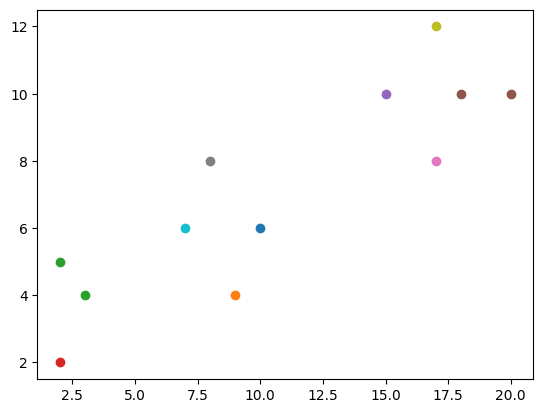

Iteration 3, clusters: 9
[[[[10, 6]], [[9, 4]]], [[[2, 5]], [[3, 4]]], [[2, 2]], [[15, 10]], [[[20, 10]], [[18, 10]]], [[17, 8]], [[8, 8]], [[17, 12]], [[7, 6]]]


Iteration 4, clusters: 8
[[[[10, 6]], [[9, 4]]], [[[[2, 5]], [[3, 4]]], [[2, 2]]], [[15, 10]], [[[20, 10]], [[18, 10]]], [[17, 8]], [[8, 8]], [[17, 12]], [[7, 6]]]


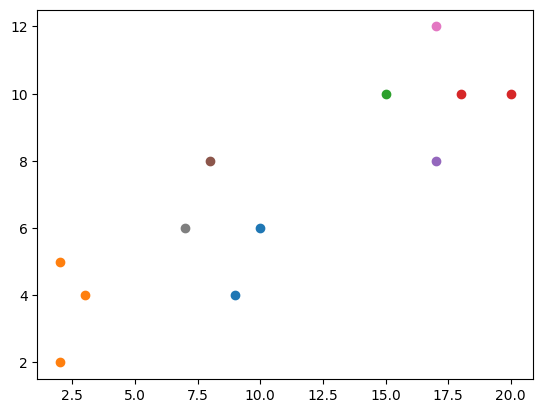

Iteration 5, clusters: 7
[[[[10, 6]], [[9, 4]]], [[[[2, 5]], [[3, 4]]], [[2, 2]]], [[15, 10]], [[[[20, 10]], [[18, 10]]], [[17, 8]]], [[8, 8]], [[17, 12]], [[7, 6]]]


Iteration 6, clusters: 6
[[[[10, 6]], [[9, 4]]], [[[[2, 5]], [[3, 4]]], [[2, 2]]], [[15, 10]], [[[[[20, 10]], [[18, 10]]], [[17, 8]]], [[17, 12]]], [[8, 8]], [[7, 6]]]


Iteration 7, clusters: 5
[[[[10, 6]], [[9, 4]]], [[[[2, 5]], [[3, 4]]], [[2, 2]]], [[15, 10]], [[[[[20, 10]], [[18, 10]]], [[17, 8]]], [[17, 12]]], [[[8, 8]], [[7, 6]]]]


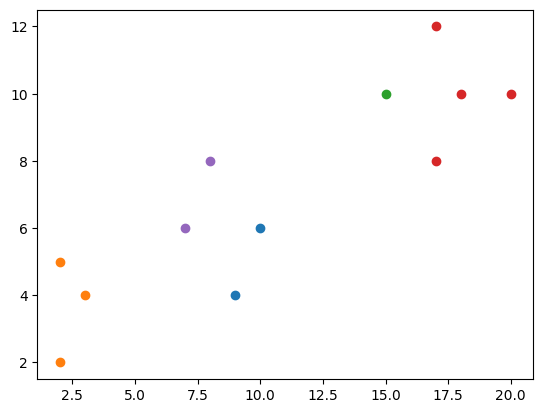

Iteration 8, clusters: 4
[[[[[10, 6]], [[9, 4]]], [[[8, 8]], [[7, 6]]]], [[[[2, 5]], [[3, 4]]], [[2, 2]]], [[15, 10]], [[[[[20, 10]], [[18, 10]]], [[17, 8]]], [[17, 12]]]]


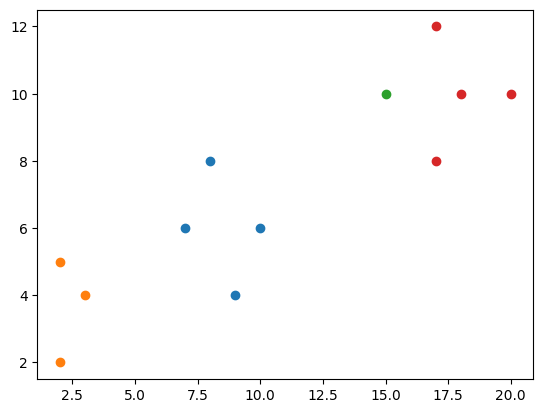

Iteration 9, clusters: 3
[[[[[10, 6]], [[9, 4]]], [[[8, 8]], [[7, 6]]]], [[[[2, 5]], [[3, 4]]], [[2, 2]]], [[[15, 10]], [[[[[20, 10]], [[18, 10]]], [[17, 8]]], [[17, 12]]]]]


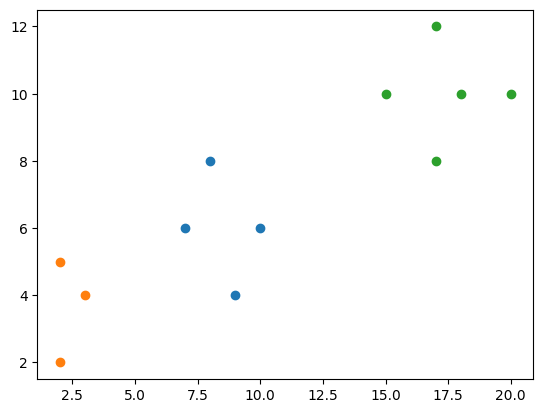

[[[[[10, 6]], [[9, 4]]], [[[8, 8]], [[7, 6]]]],
 [[[[2, 5]], [[3, 4]]], [[2, 2]]],
 [[[15, 10]], [[[[[20, 10]], [[18, 10]]], [[17, 8]]], [[17, 12]]]]]

In [14]:
ahc_clusterize(d, simple_linkage_dist, 3, show_steps=True)

##### Complete Linkage

Iteration 1, clusters: 11


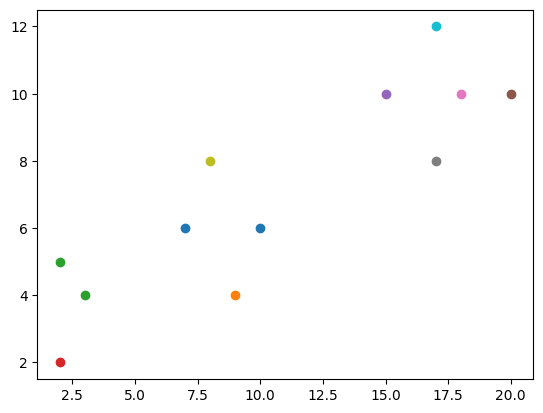

Iteration 2, clusters: 10


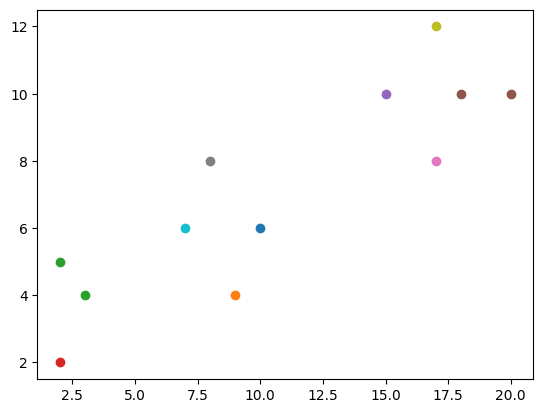

Iteration 3, clusters: 9


Iteration 4, clusters: 8


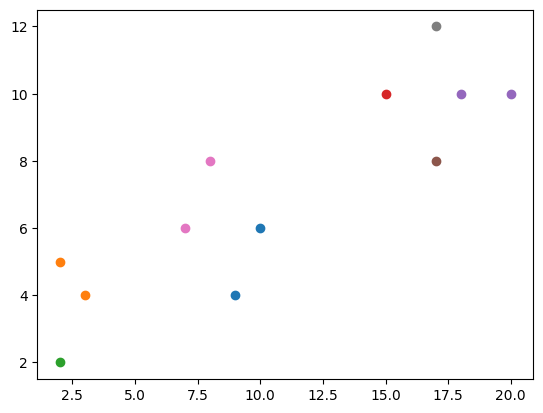

Iteration 5, clusters: 7


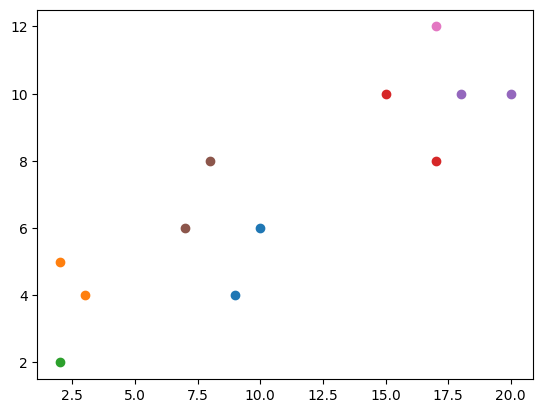

Iteration 6, clusters: 6


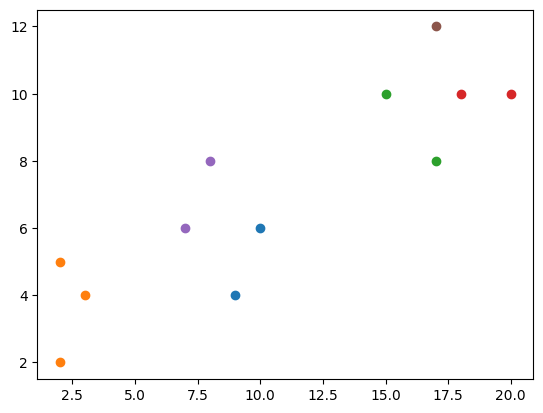

Iteration 7, clusters: 5


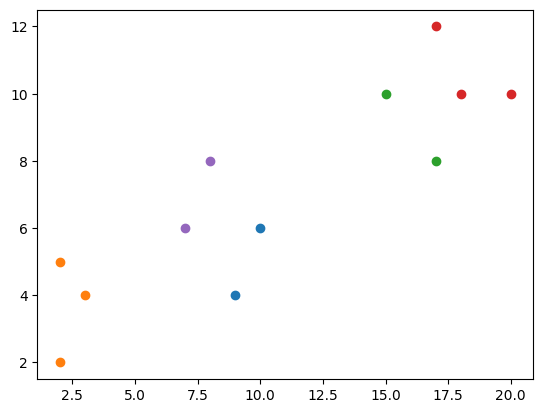

Iteration 8, clusters: 4


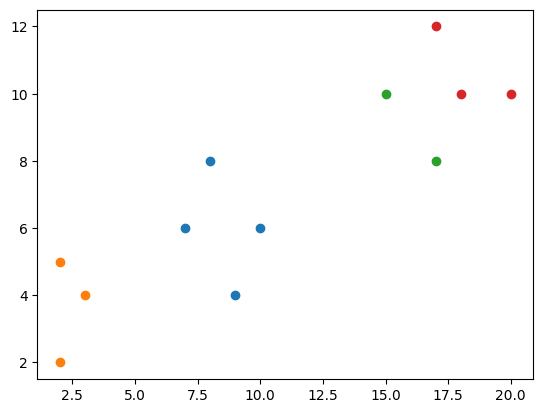

Iteration 9, clusters: 3


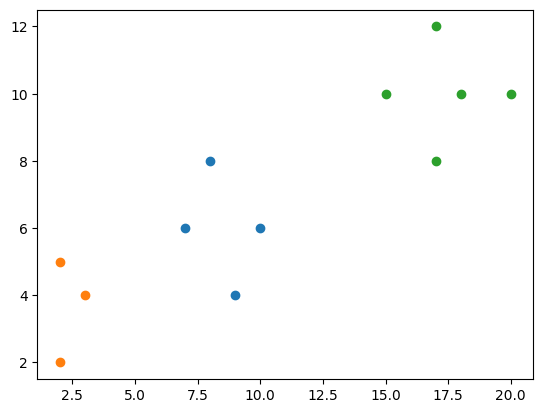

[[[[[10, 6]], [[9, 4]]], [[[8, 8]], [[7, 6]]]],
 [[[[2, 5]], [[3, 4]]], [[2, 2]]],
 [[[[15, 10]], [[17, 8]]], [[[[20, 10]], [[18, 10]]], [[17, 12]]]]]

In [11]:
ahc_clusterize(d, complete_linkage_dist, 3, show_steps=True)

##### Average Linkage

Iteration 1, clusters: 11
[[[10, 6]], [[9, 4]], [[[2, 5]], [[3, 4]]], [[2, 2]], [[15, 10]], [[20, 10]], [[18, 10]], [[17, 8]], [[8, 8]], [[17, 12]], [[7, 6]]]


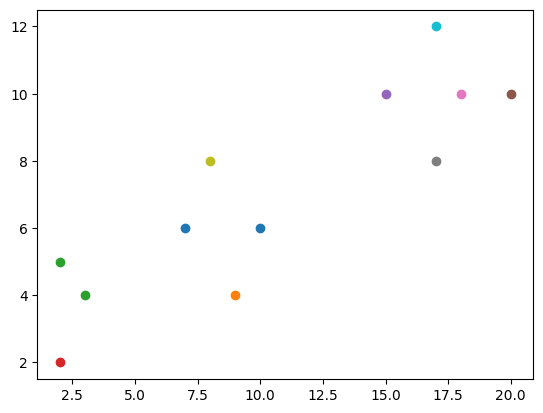

Iteration 2, clusters: 10
[[[10, 6]], [[9, 4]], [[[2, 5]], [[3, 4]]], [[2, 2]], [[15, 10]], [[[20, 10]], [[18, 10]]], [[17, 8]], [[8, 8]], [[17, 12]], [[7, 6]]]


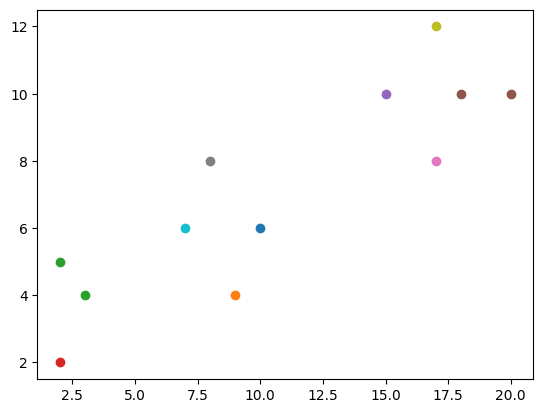

Iteration 3, clusters: 9
[[[[10, 6]], [[9, 4]]], [[[2, 5]], [[3, 4]]], [[2, 2]], [[15, 10]], [[[20, 10]], [[18, 10]]], [[17, 8]], [[8, 8]], [[17, 12]], [[7, 6]]]


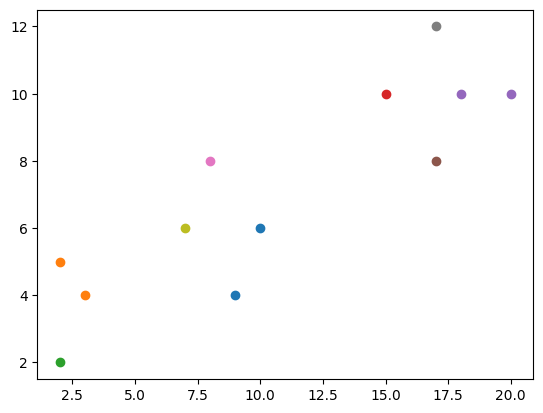

Iteration 4, clusters: 8
[[[[10, 6]], [[9, 4]]], [[[2, 5]], [[3, 4]]], [[2, 2]], [[15, 10]], [[[20, 10]], [[18, 10]]], [[17, 8]], [[[8, 8]], [[7, 6]]], [[17, 12]]]


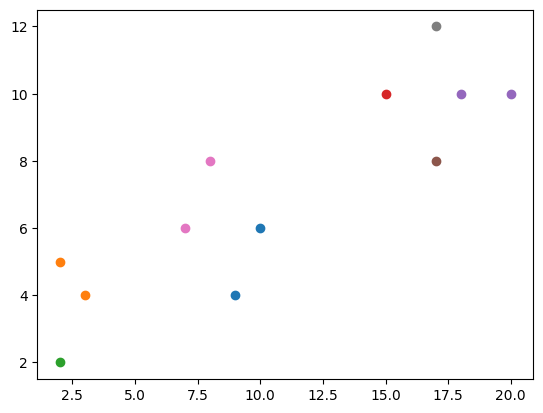

Iteration 5, clusters: 7
[[[[10, 6]], [[9, 4]]], [[[[2, 5]], [[3, 4]]], [[2, 2]]], [[15, 10]], [[[20, 10]], [[18, 10]]], [[17, 8]], [[[8, 8]], [[7, 6]]], [[17, 12]]]


Iteration 6, clusters: 6
[[[[10, 6]], [[9, 4]]], [[[[2, 5]], [[3, 4]]], [[2, 2]]], [[[15, 10]], [[17, 8]]], [[[20, 10]], [[18, 10]]], [[[8, 8]], [[7, 6]]], [[17, 12]]]


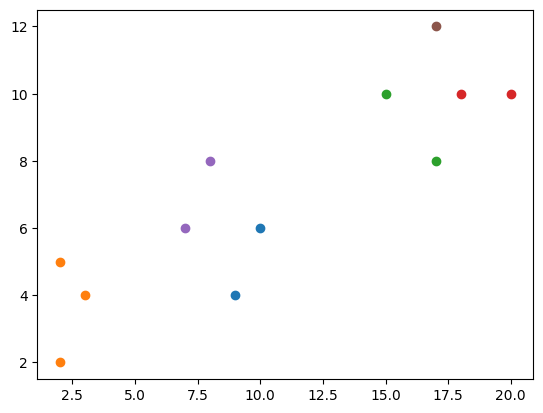

Iteration 7, clusters: 5
[[[[10, 6]], [[9, 4]]], [[[[2, 5]], [[3, 4]]], [[2, 2]]], [[[15, 10]], [[17, 8]]], [[[[20, 10]], [[18, 10]]], [[17, 12]]], [[[8, 8]], [[7, 6]]]]


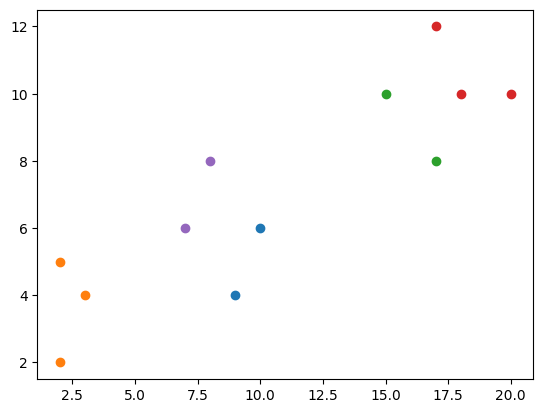

Iteration 8, clusters: 4
[[[[[10, 6]], [[9, 4]]], [[[8, 8]], [[7, 6]]]], [[[[2, 5]], [[3, 4]]], [[2, 2]]], [[[15, 10]], [[17, 8]]], [[[[20, 10]], [[18, 10]]], [[17, 12]]]]


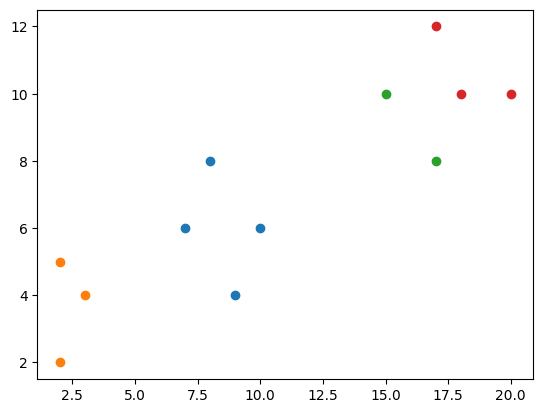

Iteration 9, clusters: 3
[[[[[10, 6]], [[9, 4]]], [[[8, 8]], [[7, 6]]]], [[[[2, 5]], [[3, 4]]], [[2, 2]]], [[[[15, 10]], [[17, 8]]], [[[[20, 10]], [[18, 10]]], [[17, 12]]]]]


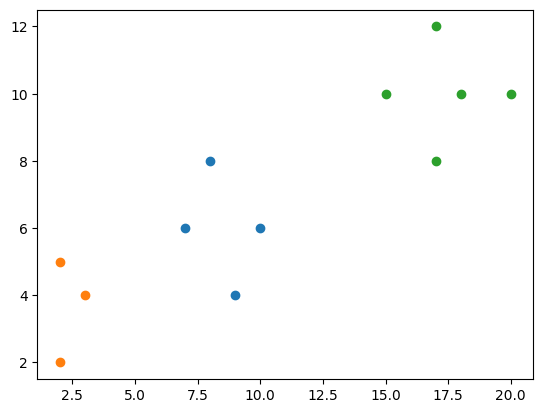

[[[[[10, 6]], [[9, 4]]], [[[8, 8]], [[7, 6]]]],
 [[[[2, 5]], [[3, 4]]], [[2, 2]]],
 [[[[15, 10]], [[17, 8]]], [[[[20, 10]], [[18, 10]]], [[17, 12]]]]]

In [15]:
ahc_clusterize(d, average_linkage_dist, 3, show_steps=True)

##### Centroid Linkage

Iteration 1, clusters: 11
[[[10, 6]], [[9, 4]], [[[2, 5]], [[3, 4]]], [[2, 2]], [[15, 10]], [[20, 10]], [[18, 10]], [[17, 8]], [[8, 8]], [[17, 12]], [[7, 6]]]


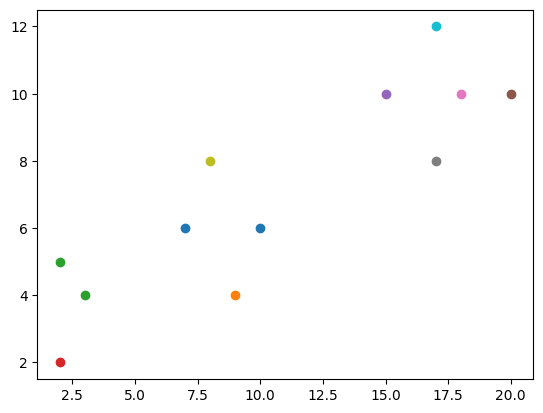

Iteration 2, clusters: 10
[[[10, 6]], [[9, 4]], [[[2, 5]], [[3, 4]]], [[2, 2]], [[15, 10]], [[[20, 10]], [[18, 10]]], [[17, 8]], [[8, 8]], [[17, 12]], [[7, 6]]]


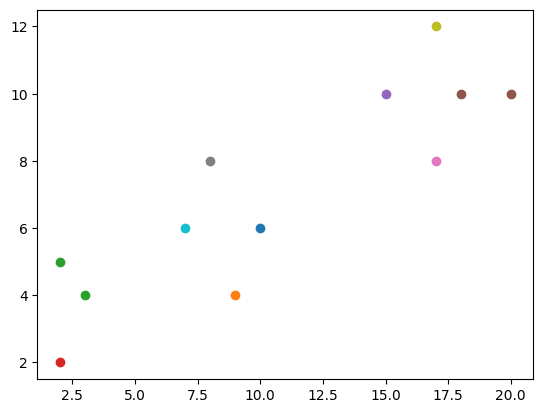

Iteration 3, clusters: 9
[[[[10, 6]], [[9, 4]]], [[[2, 5]], [[3, 4]]], [[2, 2]], [[15, 10]], [[[20, 10]], [[18, 10]]], [[17, 8]], [[8, 8]], [[17, 12]], [[7, 6]]]


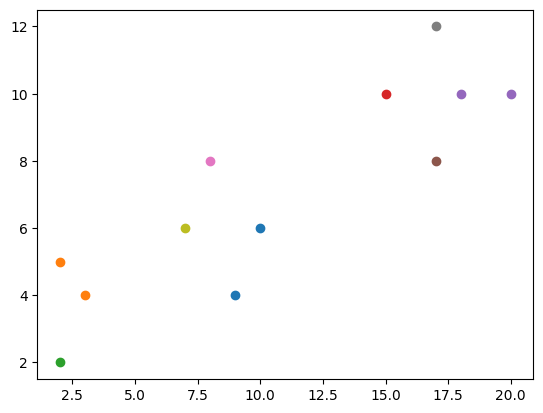

Iteration 4, clusters: 8
[[[[10, 6]], [[9, 4]]], [[[2, 5]], [[3, 4]]], [[2, 2]], [[15, 10]], [[[20, 10]], [[18, 10]]], [[17, 8]], [[[8, 8]], [[7, 6]]], [[17, 12]]]


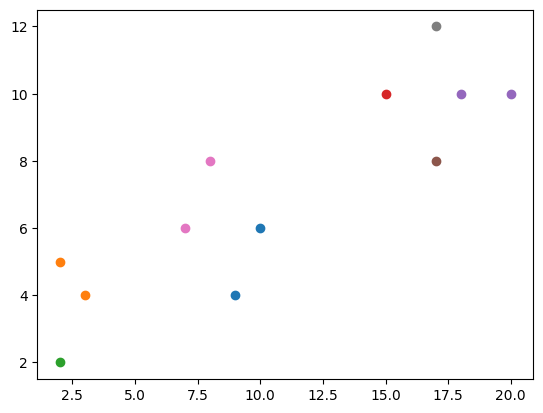

Iteration 5, clusters: 7
[[[[10, 6]], [[9, 4]]], [[[[2, 5]], [[3, 4]]], [[2, 2]]], [[15, 10]], [[[20, 10]], [[18, 10]]], [[17, 8]], [[[8, 8]], [[7, 6]]], [[17, 12]]]


Iteration 6, clusters: 6
[[[[[10, 6]], [[9, 4]]], [[[8, 8]], [[7, 6]]]], [[[[2, 5]], [[3, 4]]], [[2, 2]]], [[15, 10]], [[[20, 10]], [[18, 10]]], [[17, 8]], [[17, 12]]]


Iteration 7, clusters: 5
[[[[[10, 6]], [[9, 4]]], [[[8, 8]], [[7, 6]]]], [[[[2, 5]], [[3, 4]]], [[2, 2]]], [[[15, 10]], [[17, 8]]], [[[20, 10]], [[18, 10]]], [[17, 12]]]


Iteration 8, clusters: 4
[[[[[10, 6]], [[9, 4]]], [[[8, 8]], [[7, 6]]]], [[[[2, 5]], [[3, 4]]], [[2, 2]]], [[[15, 10]], [[17, 8]]], [[[[20, 10]], [[18, 10]]], [[17, 12]]]]


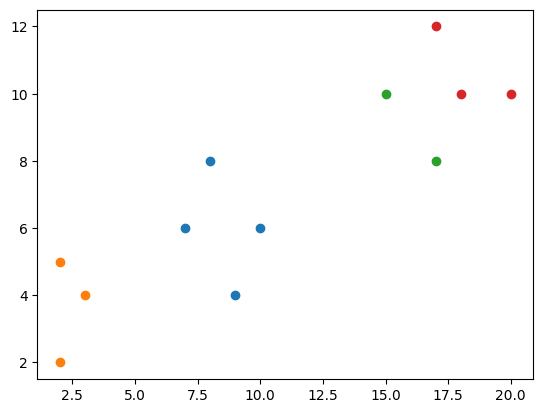

Iteration 9, clusters: 3
[[[[[10, 6]], [[9, 4]]], [[[8, 8]], [[7, 6]]]], [[[[2, 5]], [[3, 4]]], [[2, 2]]], [[[[15, 10]], [[17, 8]]], [[[[20, 10]], [[18, 10]]], [[17, 12]]]]]


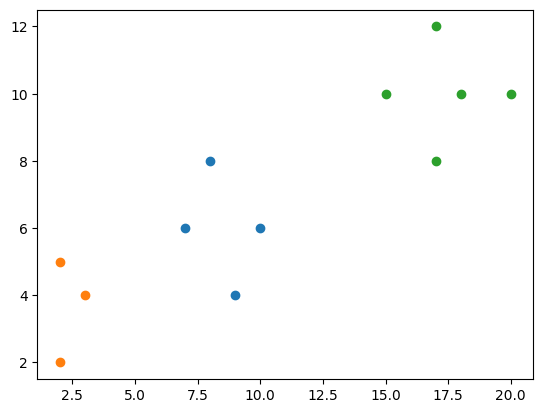

[[[[[10, 6]], [[9, 4]]], [[[8, 8]], [[7, 6]]]],
 [[[[2, 5]], [[3, 4]]], [[2, 2]]],
 [[[[15, 10]], [[17, 8]]], [[[[20, 10]], [[18, 10]]], [[17, 12]]]]]

In [16]:
ahc_clusterize(d, centroid_linkage_dist, 3, show_steps=True)

In [65]:
def mkdendrogram(tree, n=0):
    res = ''
    m = n
    
    for node in tree:
        if is_iterable(node) and not all(map(lambda x: isinstance(x, int), node)):
            m += 1
            res += mkdendrogram(node, m)
            res += 'M%d -> M%d;\n' % (n, m)
        else:
            res += 'M%d -> %d;\n' % (n, d.index([node]))
    return res
res = ahc_clusterize(d, centroid_linkage_dist, 3)
print('digraph {')
print(mkdendrogram([res]))
print('}')

digraph {
M4 -> 0;
M3 -> M4;
M5 -> 1;
M3 -> M5;
M2 -> M3;
M5 -> 8;
M4 -> M5;
M6 -> 11;
M4 -> M6;
M2 -> M4;
M1 -> M2;
M5 -> 2;
M4 -> M5;
M6 -> 10;
M4 -> M6;
M3 -> M4;
M5 -> 3;
M3 -> M5;
M1 -> M3;
M6 -> 4;
M5 -> M6;
M7 -> 7;
M5 -> M7;
M4 -> M5;
M8 -> 5;
M7 -> M8;
M9 -> 6;
M7 -> M9;
M6 -> M7;
M8 -> 9;
M6 -> M8;
M4 -> M6;
M1 -> M4;
M0 -> M1;

}
